# Exercício de fixação de conceitos 3

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

In [2]:
dados = genfromtxt('dados_diabetes.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remover cabeçalho
print(dados)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [4]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, stratify = y)

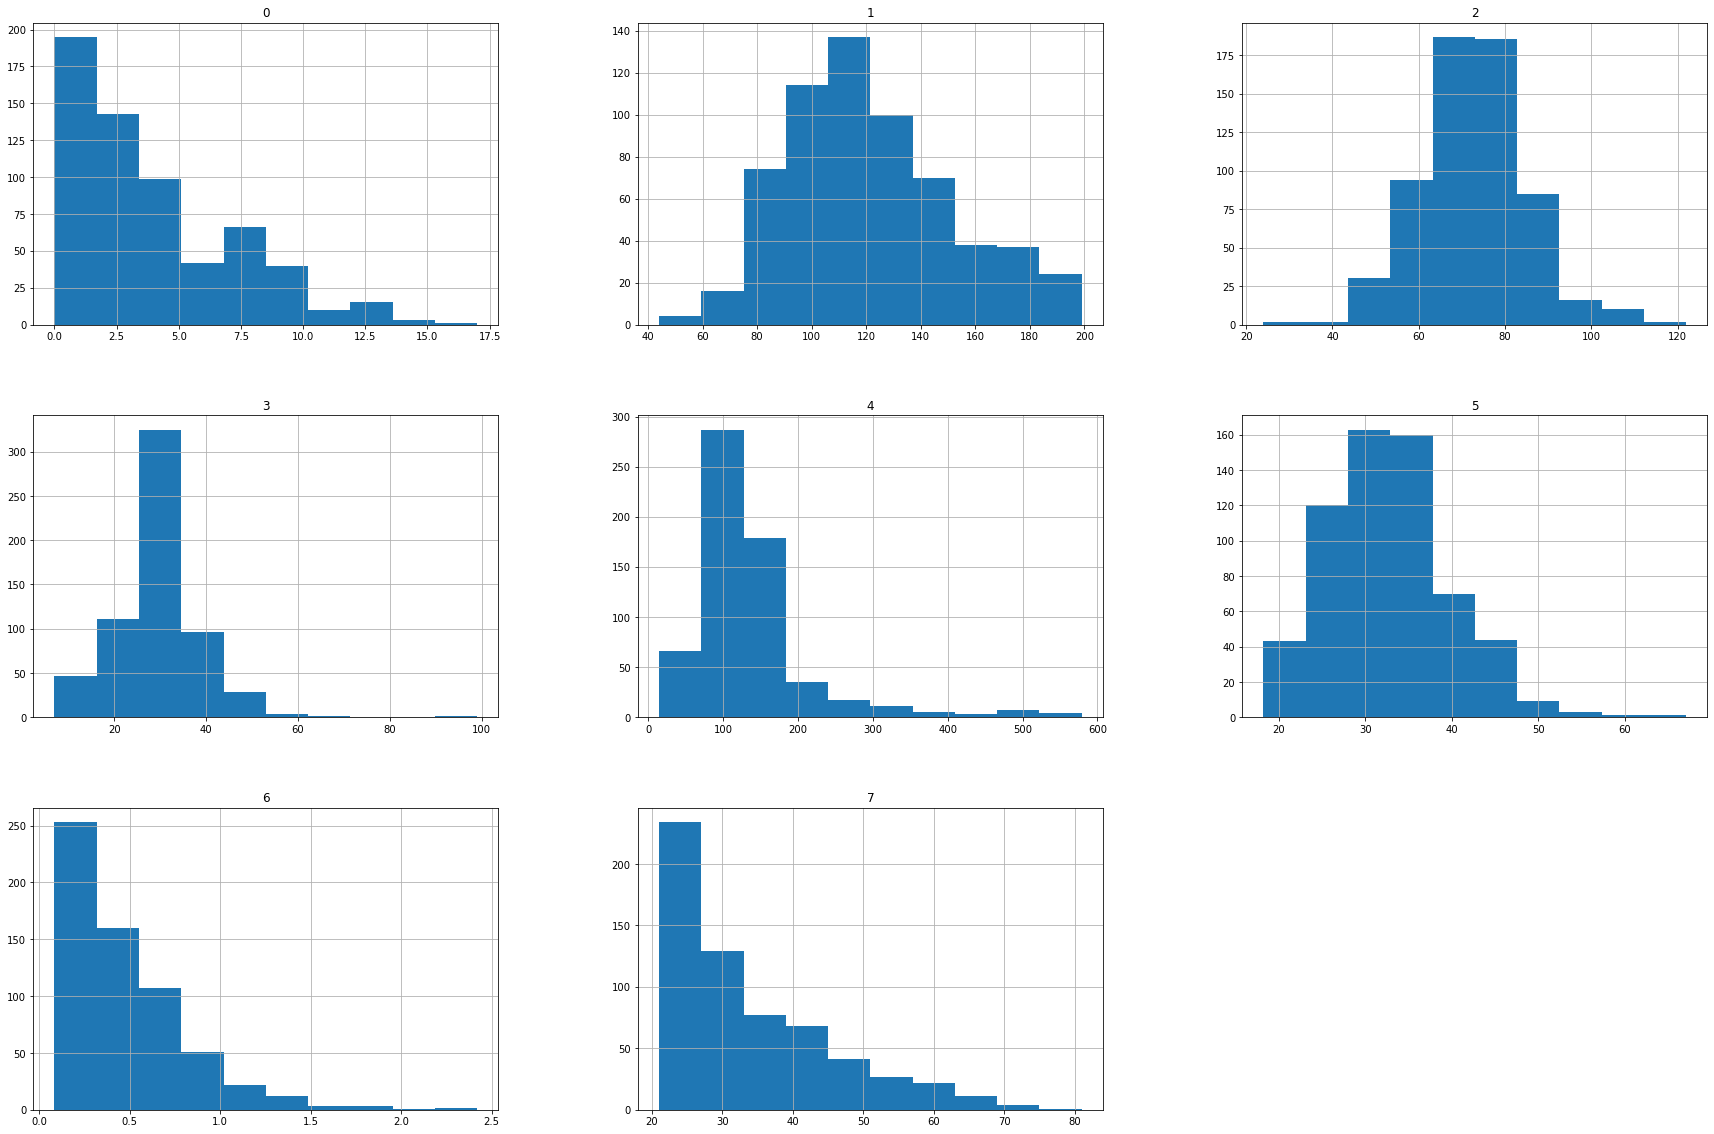

In [6]:
Xtrainpd = pd.DataFrame(Xtrain)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

In [15]:
y.sum()

268.0

In [16]:
y.shape

(768,)

In [17]:
print(ytest.sum())
ytest.shape

54.0


(154,)

Ver a proporção de diabeticos

In [7]:
mean_norm = Xtrain.mean()
std_norm = Xtrain.std()
nstd = 4
Xtrain_norm = (Xtrain - mean_norm)/(nstd*std_norm)
Xtest_norm = (Xtest - mean_norm)/(nstd*std_norm)

In [8]:
feature_vector_length = Xtrain_norm.shape[1]
num_classes = 2
input_shape = (feature_vector_length,)

In [9]:
ytrain2 = to_categorical(ytrain, 2)
ytest2 = to_categorical(ytest, 2)

O Dense do Keras já adiciona o Bias por default.

In [10]:
Nneuronios = list(range(1,25))
listacc = []
for i in Nneuronios:
    model = Sequential()
    model.add(Dense(i, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(num_classes, activation='softmax'))
    Nepochs = 1000
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    result = model.fit(Xtrain_norm, ytrain2, epochs=Nepochs, batch_size=50, verbose=1, validation_data=(Xtest_norm,ytest2))
    accuracy = model.evaluate(Xtest_norm, ytest2, verbose=1)[1]
    listacc.append(accuracy)

val_loss: 0.3750 - val_accuracy: 0.8442
Epoch 863/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8876 - val_loss: 0.3766 - val_accuracy: 0.8442
Epoch 864/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8893 - val_loss: 0.3775 - val_accuracy: 0.8442
Epoch 865/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8876 - val_loss: 0.3755 - val_accuracy: 0.8442
Epoch 866/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8827 - val_loss: 0.3748 - val_accuracy: 0.8247
Epoch 867/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8893 - val_loss: 0.3748 - val_accuracy: 0.8442
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8876 - val_loss: 0.3767 - val_accuracy: 0.8312
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0

In [24]:
accuracy

0.9155844449996948

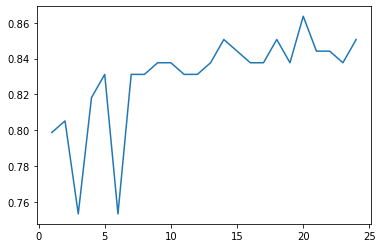

In [11]:
plt.plot(Nneuronios, listacc)

In [26]:
listacc

[0.7792207598686218,
 0.8961039185523987,
 0.798701286315918,
 0.9025974273681641,
 0.9155844449996948,
 0.798701286315918,
 0.8961039185523987,
 0.9090909361839294,
 0.9155844449996948,
 0.9025974273681641,
 0.9025974273681641,
 0.9090909361839294,
 0.9155844449996948,
 0.9090909361839294,
 0.9025974273681641,
 0.9090909361839294,
 0.9090909361839294,
 0.9025974273681641,
 0.9025974273681641,
 0.9155844449996948,
 0.9155844449996948,
 0.9155844449996948,
 0.9090909361839294,
 0.9155844449996948]

Funcoes de ativacao utilizadas
Funcao de loss
optimizer adam
nepocas 
batchsize

In [29]:
model = Sequential()
model.add(Dense(20, input_shape=input_shape))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))
Nepochs = 1000
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result = model.fit(Xtrain_norm, ytrain2, epochs=Nepochs, batch_size=50, verbose=1, validation_data=(Xtest_norm,ytest2))

/13 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8746 - val_loss: 0.3400 - val_accuracy: 0.8961
Epoch 863/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8713 - val_loss: 0.3399 - val_accuracy: 0.8961
Epoch 864/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8697 - val_loss: 0.3398 - val_accuracy: 0.8961
Epoch 865/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8746 - val_loss: 0.3400 - val_accuracy: 0.8961
Epoch 866/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8746 - val_loss: 0.3407 - val_accuracy: 0.8961
Epoch 867/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8746 - val_loss: 0.3407 - val_accuracy: 0.8961
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8713 - val_loss: 0.3400 - val_accuracy: 0.9091
Epoch 869

In [78]:
'''model = Sequential()
model.add(Dense(10, input_shape=input_shape, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
Nepochs = 1000
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result = model.fit(Xtrain_norm, ytrain2, epochs=Nepochs, batch_size=250, verbose=1, validation_split=0.2)'''

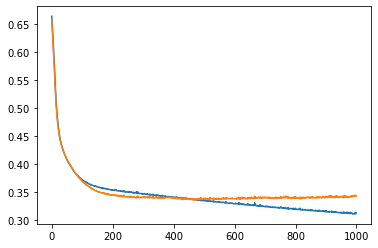

In [30]:
epoch = list(range(1,Nepochs + 1))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [85]:
test_results = model.evaluate(Xtest_norm, ytest2, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5/5 [==============================] - 0s 798us/step - loss: 0.4073 - accuracy: 0.8312
Test results - Loss: 0.4072818458080292 - Accuracy: 0.8311688303947449%
